In [2]:
!git clone "https://github.com/IEEE-CISCodeCraft/Machine-Learning-Simplified.git"

Cloning into 'Machine-Learning-Simplified'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 61 (delta 15), reused 27 (delta 12), pack-reused 24
Receiving objects: 100% (61/61), 3.93 MiB | 22.23 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [3]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 39.7 MB/s eta 0:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Read the dataset as pandas Dataframe
data = pd.read_csv("/content/Machine-Learning-Simplified/Day-4/heart.csv")

In [6]:
# Print the data
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [7]:
# Get insights of Data
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
# Search for any NULL values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
# Separate features (X) and target (y)
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

In [10]:
# Encode categorical variables
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_cols])

In [11]:
# Create a DataFrame with encoded features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

In [12]:
# Concatenate encoded features with remaining numerical features
X_final = pd.concat([X.drop(columns=categorical_cols), X_encoded_df], axis=1)

In [13]:
# Normalize numerical features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_final)

In [14]:
# Convert numpy array back to DataFrame with correct column names
X_normalized_df = pd.DataFrame(X_normalized, columns=X_final.columns)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)

In [16]:
# Set up the PyCaret experiment
experiment = setup(data=pd.concat([X_train, y_train], axis=1), target='HeartDisease')

,Description,Value
0,Session id,5852
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(734, 16)"
4,Transformed data shape,"(734, 16)"
5,Transformed train set shape,"(513, 16)"
6,Transformed test set shape,"(221, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [17]:
# Compare various models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8713,0.0000,0.9000,0.8717,0.8847,0.7391,0.7416,0.0660
rf,Random Forest Classifier,0.8694,0.9356,0.9036,0.8659,0.8830,0.7353,0.7393,1.1110
lr,Logistic Regression,0.8675,0.9352,0.9000,0.8672,0.8815,0.7313,0.7360,0.8110
lda,Linear Discriminant Analysis,0.8655,0.9360,0.8964,0.8650,0.8796,0.7272,0.7297,0.1000
nb,Naive Bayes,0.8615,0.9268,0.8821,0.8687,0.8743,0.7200,0.7224,0.0910
gbc,Gradient Boosting Classifier,0.8615,0.9234,0.8929,0.8615,0.8756,0.7196,0.7230,0.6600
et,Extra Trees Classifier,0.8537,0.9348,0.8714,0.8650,0.8670,0.7043,0.7070,0.4560
knn,K Neighbors Classifier,0.8479,0.9078,0.8821,0.8495,0.8638,0.6914,0.6957,0.1600
lightgbm,Light Gradient Boosting Machine,0.8459,0.9407,0.8750,0.8530,0.8616,0.6878,0.6930,0.6540
xgboost,Extreme Gradient Boosting,0.8458,0.9297,0.8786,0.8497,0.8614,0.6876,0.6935,0.1520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [18]:
# Fine-tune the best model
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8654,0.0000,0.8571,0.8889,0.8727,0.7300,0.7305
1,0.8654,0.0000,0.9286,0.8387,0.8814,0.7267,0.7318
2,0.9038,0.0000,0.9643,0.8710,0.9153,0.8048,0.8104
3,0.9412,0.0000,0.8929,1.0000,0.9434,0.8826,0.8887
4,0.8235,0.0000,0.8571,0.8276,0.8421,0.6422,0.6428
5,0.7451,0.0000,0.8214,0.7419,0.7797,0.4792,0.4827
6,0.9216,0.0000,0.9643,0.9000,0.9310,0.8404,0.8431
7,0.9020,0.0000,0.8929,0.9259,0.9091,0.8028,0.8034
8,0.9020,0.0000,1.0000,0.8485,0.9180,0.7981,0.8149


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [19]:
# Finalize the best model
final_model = finalize_model(tuned_model)

In [20]:
# Evaluate model using different graphs
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

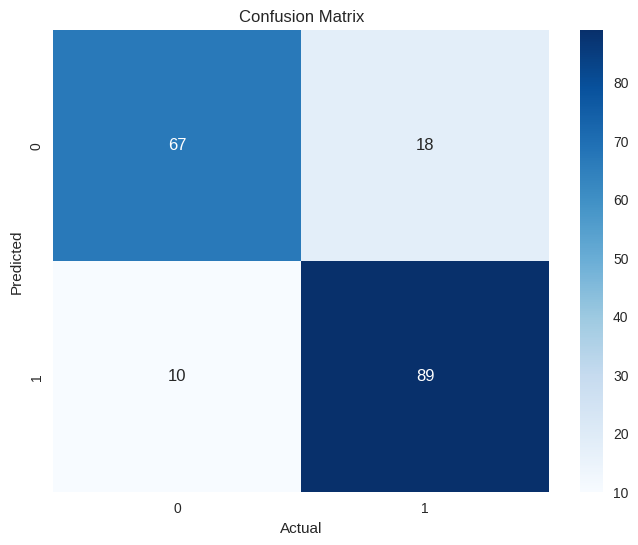

In [21]:
# Make predictions using the final model
predictions = predict_model(final_model, data=X_test)

# Calculate the confusion matrix
confusion_matrix = pd.crosstab(predictions['prediction_label'], y_test, rownames=['Predicted'], colnames=['Actual'])

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()